## import all needed liberary

In [574]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
from skimage.exposure import equalize_adapthist 
from skimage import filters
from skimage import measure
from skimage.draw import polygon
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
from skimage.draw import rectangle
import imutils
from skimage.exposure import histogram
from matplotlib.pyplot import bar


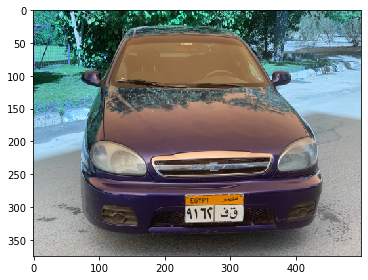

In [575]:
img_data1 =cv2.imread("dataset\data6.jpeg")
img_data1 = imutils.resize(img_data1 , width = 500)
io.imshow(img_data1)


In [576]:
def Sobel (img):   
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    grad = np.sqrt(grad_x**2 + grad_y**2)
    grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
    return grad_norm


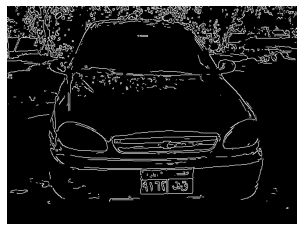

[[119 119 126 ... 106 147 147]
 [129 119 127 ... 141 150 152]
 [153 124 162 ... 148 155 153]
 ...
 [183 186 186 ... 188 190 189]
 [184 184 186 ... 185 185 189]
 [185 187 189 ... 190 190 192]]


In [577]:
def show_image (img):
    fig = plt.figure()
    plt.gray()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def image_preprocessing (img):
    '''
        in this function we are going to applying different preprocessing 
        techniques in the input image 

        prams:
                img 
    '''
    gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)    # convert image to grayscale 
    gray = cv2.bilateralFilter(gray_img, 11, 17, 17)
    edged = cv2.Canny(gray, 170, 200)
    
    #equalized_image = equalize_adapthist(gray_img) # applaying histogram equalization 
    
    #edged = Sobel(gray) # applaying edge detection using sobel algorithm  
    # we need to discuss the best way to get the best threshold 
    #result = ((edged >0.1))  # convert image to binary using thresholding value 
    return edged , gray


preprocessed_img  , gray_img= image_preprocessing(img_data1)
show_image(preprocessed_img)
io.imsave('result1.jpg' , preprocessed_img)
print(gray_img)

In [578]:
def edge_img_processing(edge_img , img ):
    #Thresholding:
    #gray = cv2.cvtColor(edge_img, cv2.COLOR_BGR2GRAY)
    #T, edge_img_t = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
    edge_img_t=edge_img
    #Finding contours (only need the external contour):
    cnts, _ = cv2.findContours(edge_img_t, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #cnts=sorted(cnts, key = cv2.contourArea, reverse = false)[:50] 

    plates = []
    for i, c in enumerate(cnts):
        x,y,w,h = cv2.boundingRect(c)
        area = w *h 
        aspect_ratio = w/h 
       
        if (1.3< aspect_ratio < 3.5  and area >500):
            plate = img[y:y+h, x:x+w]
            plate[(plate>=100)] = 255
            plate[(plate < 100)] = 0 
            ints = np.sum(plate)
            #print (ints)
            sm = area*255*0.99
            print(ints,sm)
            #print (ints,sm , plate[0])
            if (ints > sm):
                plates.append(plate)
                cv2.rectangle(img, (x, y), (x + w, y + h), (100,0,0), 1)

    #plates.sort(key=lambda by_x: by_x[1])
    #Writing the found contour into a folder
    for i, char in enumerate(plates):
        cv2.imwrite(f'Scannedplates/Char{i}.jpg', char )
    return  edge_img_t , img, plates

edge_img , img ,plates= edge_img_processing(preprocessed_img , gray_img)
print(np.array(plates).shape)
cv2.imshow('plates' , img)
cv2.waitKey()

45645 161063.1
560490 735134.4
487560 585179.1
808605 1020402.9
124695 173685.6
133875 132536.25
416160 527620.5
402135 778050.9
47940 143896.5
1077120 2401304.4
(1, 15, 35)


-1

In [579]:
def Get_Contours (img):
    h = img.shape[0]
    w = img.shape[1]
    
    # Getting all contours form the image 
    #contours = (measure.find_contours(img, 0.8))
    contours = cv2.findContours(img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours_image =255* np.zeros((h, w), dtype=np.uint8)

    bounding_boxes = []
    img_with_boxes = img_data1.copy()
    
    #save contours in an image 
    for contour in contours:
        
        x_cordinates = contour[:,1]
        y_cordinates = contour[:,0]

        x_max = x_cordinates.max()
        y_max = y_cordinates.max()
        x_min = x_cordinates.min()
        y_min = y_cordinates.min()

        x_diff = x_max-x_min
        y_diff = y_max-y_min

        ratio = x_diff/y_diff
        area = x_diff * y_diff
        if ratio>1.9 and ratio<3.1 and area >1500 :
            print(area)
        #contours_image[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1
            box  = [int(np.round(x_min)),int(np.round(x_max)),int(np.round(y_min)),int(np.round(y_max))]
            bounding_boxes.append(box)


    temp_img = img.copy()


    for box in bounding_boxes:
        [xmin,xmax,ymin,ymax] = box
        rr, cc = rectangle(start=(ymin,xmin),end=(ymax,xmax),shape=img.shape)
        img_with_boxes[rr,cc] = 0


    show_image(img_with_boxes)

    return  img_with_boxes


contours_image =Get_Contours(preprocessed_img)
io.imsave('result2.jpg' , contours_image)


TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
def contours_evaluation(contour):
    pass
    


In [ ]:
def Hough_Transform (img):
    img_shape = img.shape
    # image width and height
    x_max = img_shape[0]
    y_max = img_shape[1]
    
    theta_max = 1.0 * math.pi
    theta_min = 0.0
    
    r_min =0 
    r_max = math.hypot(x_max ,y_max)
    
    r_dim =200
    theta_dim =300
    
    houghSpace = np.zeros((r_dim , theta_dim))
    
    for x in range (x_max):
        for y in range(y_max):
            if img[x,y] ==0:continue
            for itheta  in range (theta_dim):
                theta = 1.0 *  itheta * theta_max /  theta_dim
                r = x * np.cos(theta) + y * np.sin(theta)
                ir = r_dim * (1.0 * r) /r_max
                
                houghSpace[np.round(ir).astype('int'),np.round(itheta).astype('int')]=  houghSpace[np.round(ir).astype('int'),np.round(itheta).astype('int')]+1
 
Hough_Transform(contours_image)               
    
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
  '''
    ax.imshow(contours_image)
    for contour in contours:
            rr, cc = polygon(contour[:, 0], contour[:, 1], contours_image.shape)
            contours_image[rr, cc] = 0

            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax.axis('Image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    '''